In [13]:
import os
from dotenv import load_dotenv
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
from IPython.display import display
pd.set_option('display.max_columns', None)

load_dotenv()
data_dir = os.getenv('DATA_DIR', 'data')
warnings.filterwarnings('ignore')


In [14]:
dataset=os.path.join(data_dir, "midterm-regresi-dataset.csv")
assert os.path.exists(dataset), f"{dataset} not found"


In [15]:
def memory_report(df):
    mem = df.memory_usage(deep=True).sum() / 1024**2
    print(f"DataFrame memory usage: {mem:.2f} MB")
    return mem
memory_report(pd.read_csv(dataset))

DataFrame memory usage: 357.79 MB


np.float64(357.79052734375)

In [16]:
#dataset shape
df = pd.read_csv(dataset)
print(f"Dataset shape: {df.shape}")

Dataset shape: (515344, 91)


In [17]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 515344 │ │ float64     │ 90    │                                                          │
│ │ Number of columns │ 91     │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column       ┃ NA  ┃ NA %  ┃ mean      ┃ sd     ┃ p0      ┃ p25     ┃ p50       ┃ p75     ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ 2001         │   0 │     0 │      1998 │  10.93 │    1922 │    1994 │      2002 │    2006 │  2011 │    ▁▂▇ │  │
│ │ 49.94357     │   0 │     0 │     43.39 │  6.068 │   1.749 │   39.95 │     44.26 │   47.83 │ 61.97 │   ▁▃▇  │  │
│ │ 21.47114     │   0 │     0 │      1.29 │  51.58 │  -337.1 │  -26.06 │     8.418 │   36.12 │ 384.1 │   ▁▇▅  │  │
│ │ 73.0775      │   0 │     0 │     8.658 │  35.27 │    -301 │  -11.46 │     10.48 │   29.76 │ 322.9 │    ▇▇  │  │
│ │ 8.74861      │   0 │     0 │     1.164 │  16.32 │  -154.2 │  -8.488 │   -0.6529 │   8.788 │ 335.8 │   ▇▃   │  │
│ │ -17.40628    │   0 │     0 │    -6.554 │  22.86 │    -182 │  -20.67 │    -6.008 │   7.742 │ 262.1 │   ▁▇   │  │
│ │ -13.09905    │   0 │     0 │    -9.522 │  12.86 │  -81.79 │  -18.44 │    -11.19 │  -2.389 │ 166.2 │   ▇▂   │  │
│ │ -25.01202    │   0 │     0 │    -2.391 │  14.57 │  -188.2 │  -10.78 │    -2.047 │   6.509 │ 172.4 │    ▃▇  │  │
│ │ -12.23257    │   0 │     0 │    -1.793 │  7.964 │   -72.5 │  -6.468 │    -1.736 │   2.913 │ 126.7 │   ▃▇   │  │
│ │ 7.83089      │   0 │     0 │     3.728 │  10.58 │  -126.5 │  -2.294 │     3.822 │   9.962 │ 146.3 │    ▇▃  │  │
│ │ -2.46783     │   0 │     0 │     1.882 │   6.53 │  -41.63 │  -2.445 │     1.784 │   6.147 │ 60.35 │   ▁▇▁  │  │
│ │ 3.32136      │   0 │     0 │   -0.1465 │  4.371 │  -69.68 │  -2.652 │  -0.09795 │   2.436 │ 88.02 │    ▇   │  │
│ │ -2.31521     │   0 │     0 │     2.546 │   8.32 │  -94.04 │   -2.55 │     2.314 │    7.36 │ 87.91 │    ▂▇  │  │
│ │ 10.20556     │   0 │     0 │     33.71 │  22.26 │  0.1328 │   18.24 │      29.1 │   43.43 │ 549.8 │   ▇    │  │
│ │ 611.10913    │   0 │     0 │      2439 │   1749 │   8.474 │    1316 │      2009 │    3042 │ 65740 │   ▇    │  │
│ │ 951.0896     │   0 │     0 │      1968 │   1261 │   21.21 │    1114 │      1688 │    2489 │ 36820 │   ▇    │  │
│ │ 698.11428    │   0 │     0 │      1515 │   1093 │   17.86 │     815 │      1241 │    1892 │ 31850 │   ▇    │  │
│ │ 408.98485    │   0 │     0 │       911 │  475.7 │   12.15 │   606.5 │     817.3 │    1101 │ 19870 │   ▇    │  │
│ │ 383.70912    │   0 │     0 │     879.1 │  576.9 │   5.518 │   487.9 │     739.5 │    1114 │ 16830 │   ▇    │  │
│ │ 326.51512    │   0 │     0 │     603.7 │  317.5 │   19.81 │   392.4 │     541.5 │   740.7 │ 11900 │   ▇    │  │
│ │ 238.11327    │   0 │     0 │     517.6 │  309.4 │   6.255 │   318.6 │     444.8 │     627 │  9570 │   ▇    │  │
│ │ 251.42414    │   0 │     0 │       394 │    214 │   6.184 │   257.5 │     349.7 │   476.1 │  9617 │   ▇    │  │
│ │ 187.17351    │   0 │     0 │     325.7 │  165.7 │   

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515344 entries, 0 to 515343
Data columns (total 91 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   2001        515344 non-null  int64  
 1   49.94357    515344 non-null  float64
 2   21.47114    515344 non-null  float64
 3   73.0775     515344 non-null  float64
 4   8.74861     515344 non-null  float64
 5   -17.40628   515344 non-null  float64
 6   -13.09905   515344 non-null  float64
 7   -25.01202   515344 non-null  float64
 8   -12.23257   515344 non-null  float64
 9   7.83089     515344 non-null  float64
 10  -2.46783    515344 non-null  float64
 11  3.32136     515344 non-null  float64
 12  -2.31521    515344 non-null  float64
 13  10.20556    515344 non-null  float64
 14  611.10913   515344 non-null  float64
 15  951.0896    515344 non-null  float64
 16  698.11428   515344 non-null  float64
 17  408.98485   515344 non-null  float64
 18  383.70912   515344 non-null  float64
 19  32

In [19]:
# Get column names and basic understanding
print("Column names:")
print(df.columns.tolist())
print(f"\nData types:\n{df.dtypes.value_counts()}")
print(f"\nFirst few rows:")
df.head()

Column names:
['2001', '49.94357', '21.47114', '73.0775', '8.74861', '-17.40628', '-13.09905', '-25.01202', '-12.23257', '7.83089', '-2.46783', '3.32136', '-2.31521', '10.20556', '611.10913', '951.0896', '698.11428', '408.98485', '383.70912', '326.51512', '238.11327', '251.42414', '187.17351', '100.42652', '179.19498', '-8.41558', '-317.87038', '95.86266', '48.10259', '-95.66303', '-18.06215', '1.96984', '34.42438', '11.7267', '1.3679', '7.79444', '-0.36994', '-133.67852', '-83.26165', '-37.29765', '73.04667', '-37.36684', '-3.13853', '-24.21531', '-13.23066', '15.93809', '-18.60478', '82.15479', '240.5798', '-10.29407', '31.58431', '-25.38187', '-3.90772', '13.29258', '41.5506', '-7.26272', '-21.00863', '105.50848', '64.29856', '26.08481', '-44.5911', '-8.30657', '7.93706', '-10.7366', '-95.44766', '-82.03307', '-35.59194', '4.69525', '70.95626', '28.09139', '6.02015', '-37.13767', '-41.1245', '-8.40816', '7.19877', '-8.60176', '-5.90857', '-12.32437', '14.68734', '-54.32125', '40.147

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.0896,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.7267,1.3679,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,73.04667,-37.36684,-3.13853,-24.21531,-13.23066,15.93809,-18.60478,82.15479,240.5798,-10.29407,31.58431,-25.38187,-3.90772,13.29258,41.5506,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.5911,-8.30657,7.93706,-10.7366,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.1245,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,4.59210,2.21920,0.34006,44.38997,2056.93836,605.40696,457.41175,777.15347,415.64880,746.47775,366.45320,317.82946,273.07917,141.75921,317.35269,19.48271,-65.25496,162.75145,135.00765,-96.28436,-86.87955,17.38087,45.90742,32.49908,-32.85429,45.10830,26.84939,-302.57328,-41.71932,-138.85034,202.18689,-33.44277,195.04749,-16.93235,-1.09168,-25.38061,-12.19034,-125.94783,121.74212,136.67075,41.18157,28.55107,1.52298,70.99515,-43.63073,-42.55014,129.82848,79.95420,-87.14554,-45.75446,-65.82100,-43.90031,-19.45705,12.59163,-407.64130,42.91189,12.15850,-88.37882,42.25246,46.49209,-30.17747,45.98495,130.47892,13.88281,-4.00055,17.85965,-18.32138,-87.99109,14.37524,-22.70119,-58.81266,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,1.39518,2.73553,0.82804,7.46586,699.54544,1016.00954,594.06748,355.73663,507.39931,387.69910,287.15347,112.37152,161.68928,144.14353,199.29693,-4.24359,-297.00587,-148.36392,-7.94726,-18.71630,12.77542,-25.37725,9.71410,0.13843,26.79723,6.30760,28.70107,-74.89005,-289.19553,-166.26089,13.09302,5.89085,6.89034,-10.97160,1.67565,11.43523,-7.27994,133.08169,141.86758,-56.99356,98.15952,18.50939,16.97216,24.26629,-10.50788,-8.68412,54.75759,194.74034,7.95966,-18.22685,0.06463,-2.63069,26.02561,1.75729,-262.36917,-233.60089,-2.50502,-12.14279,81.37617,2.07554,-1.82381,183.65292,22.64797,-39.98887,43.37381,-31.56737,-4.88840,-36.53213,-23.94662,-84.19275,66.00518,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,-6.36304,6.63016,-3.35142,37.64085,2174.08189,697.43346,459.24587,742.78961,229.30783,387.89697,249.06662,245.89870,176.20527,98.82222,150.97286,78.49057,-62.00282,43.49659,-96.42719,-108.96608,14.22854,14.54178,-23.55608,-39.36953,-43.59209,20.83714,35.63919,-181.34947,-93.66614,-90.55616,-0.01744,23.22717,-25.48348,-25.88070,12.59198,-24.85116,-7.20736,778.02248,61.15940,23.37585,-97.64925,4.56917,-37.32280,4.15159,12.24315,35.02697,-178.89573,82.46573,-20.49425,101.78577,-19.77808,-21.52657,3.36303,-11.63176,51.55411,-50.57576,-28.14755,-83.15795,-7.35260,-22.11505,1.18279,-122.70467,150.57360,24.37468,41.19821,-37.04318,-28.72986,162.19614,22.18309,-8.63509,85.23416,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,0.93609,1.60923,2.19223,47.32082,894.28471,809.86615,318.78559,435.04497,341.61467,334.30734,322.99589,190.61921,235.84715,96.89517,210.58870,5.60463,-199.63958,204.85812,-77.17695,-65.79741,-6.95097,-12.15262,-3.85410,20.68990,-20.30480,37.15045,11.20673,-124.09519,-295.98542,-33.31169,28.68782,-32.73982,-26.60955,-69.07501,5.73467,-15.47984,-15.55296,150.29661,176.95972,58.18014,25.96952,45.25506,10.42226,27.88782,-17.12676,-31.54772,-76.86293,41.17343,-138.32535,-53.96905,-21.30266,-24.87362

## Missing Values Analysis

In [20]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Percentage': missing_percentages
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print(f"Total columns with missing values: {len(missing_df)}")
print(f"\nColumns with missing values:")
print(missing_df)

if len(missing_df) > 0:
    # Visualize missing values
    plt.figure(figsize=(12, 6))
    missing_df['Percentage'].head(20).plot(kind='barh', color='coral')
    plt.xlabel('Percentage of Missing Values')
    plt.title('Top 20 Columns with Missing Values')
    plt.tight_layout()
    plt.show()
else:
    print("\n✓ No missing values found in the dataset!")

Total columns with missing values: 0

Columns with missing values:
Empty DataFrame
Columns: [Missing_Count, Percentage]
Index: []

✓ No missing values found in the dataset!


## Duplicate Rows Analysis

In [21]:
# Check for duplicate rows
print(f"Total rows: {len(df):,}")
print(f"Duplicate rows: {df.duplicated().sum():,}")

if df.duplicated().sum() > 0:
    print(f"\nRemoving {df.duplicated().sum():,} duplicate rows...")
    df = df.drop_duplicates()
    print(f"Rows after removing duplicates: {len(df):,}")
else:
    print("\n✓ No duplicate rows found!")

Total rows: 515,344
Duplicate rows: 214

Removing 214 duplicate rows...
Rows after removing duplicates: 515,130


## Target Variable Analysis

The target variable represents the **year a song was released**. This is a regression task where we predict release year from audio features.

Target variable: 2001

Target variable statistics:
count    515130.000000
mean       1998.396300
std          10.931639
min        1922.000000
25%        1994.000000
50%        2002.000000
75%        2006.000000
max        2011.000000
Name: 2001, dtype: float64


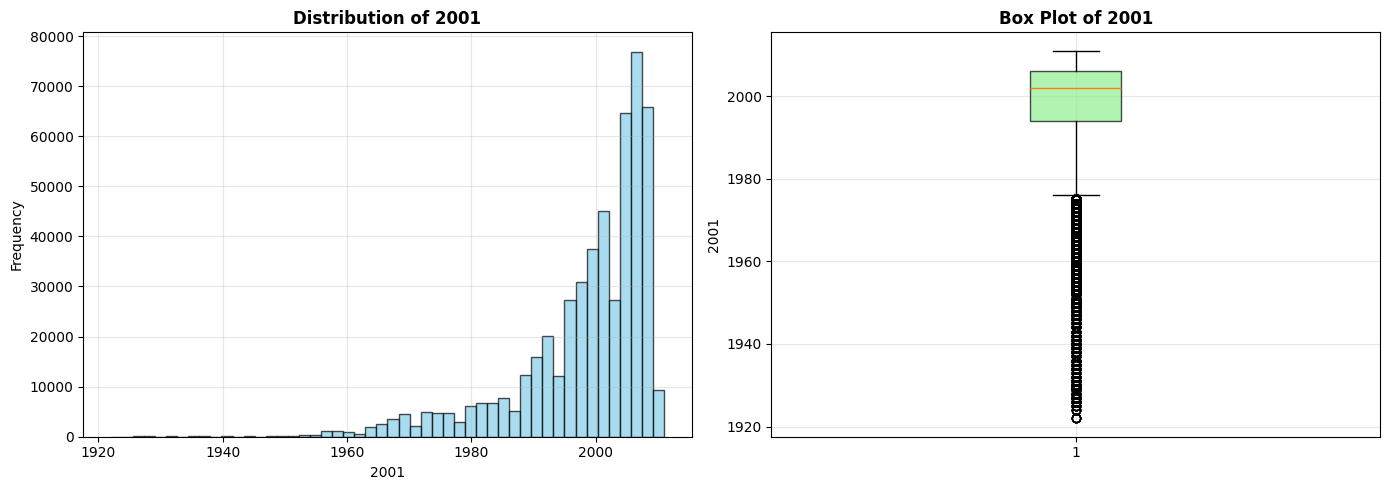


Outliers in target variable: 29,695 (5.76%)


In [ ]:
# Identify target variable (assuming first column is the target)
target_col = df.columns[0]
print(f"Target variable: {target_col} (Song Release Year)")
print(f"\nTarget variable statistics:")
print(df[target_col].describe())

# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df[target_col], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].set_title(f'Distribution of Song Release Years', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Release Year')
axes[0].set_ylabel('Frequency (Number of Songs)')
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(df[target_col], vert=True, patch_artist=True, 
                boxprops=dict(facecolor='lightgreen', alpha=0.7))
axes[1].set_title(f'Box Plot of Song Release Years', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Release Year')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Check for outliers in target
Q1 = df[target_col].quantile(0.25)
Q3 = df[target_col].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[target_col] < (Q1 - 1.5 * IQR)) | (df[target_col] > (Q3 + 1.5 * IQR))).sum()
print(f"\nOutliers in target variable: {outliers:,} ({outliers/len(df)*100:.2f}%)")
print(f"Note: These are songs with unusually early or late release years compared to the dataset distribution")

## Audio Feature Analysis

All features are audio characteristics extracted from songs (timbre, pitch, rhythm patterns, etc.)

In [ ]:
# Identify numerical and categorical features
target_col = df.columns[0]
feature_cols = df.columns[1:]

# All features are numerical (float64) - these are audio features
numerical_features = feature_cols.tolist()

print(f"Target: {target_col} (Song Release Year)")
print(f"Number of audio features: {len(numerical_features)}")
print(f"All features are numerical (float64) - representing audio characteristics")

# Basic statistics for all features
print(f"\nAudio feature statistics summary:")
print(df[numerical_features].describe().T[['mean', 'std', 'min', 'max']].head(10))

Target: 2001
Number of features: 90
All features are numerical (float64)

Feature statistics summary:
                mean        std        min        max
49.94357   43.386243   6.067918    1.74900   61.97014
21.47114    1.284453  51.583820 -337.09250  384.06573
73.0775     8.658865  35.270798 -301.00506  322.85143
8.74861     1.164394  16.322518 -154.18358  335.77182
-17.40628  -6.553821  22.861826 -181.95337  262.06887
-13.09905  -9.521523  12.858266  -81.79429  166.23689
-25.01202  -2.391044  14.572838 -188.21400  172.40268
-12.23257  -1.793166   7.964288  -72.50385  126.74127
7.83089     3.727748  10.583763 -126.47904  146.29795
-2.46783    1.882386   6.530349  -41.63166   60.34535


## Correlation Analysis with Song Release Year

Which audio features are most predictive of when a song was released?

Calculating correlations with target variable...

Top 15 features most positively correlated with target:
49.94357     0.225345
-25.01202    0.110461
82.15479     0.096069
238.11327    0.087075
-8.40816     0.083760
7.19877      0.081745
70.95626     0.081382
611.10913    0.078722
-83.26165    0.074450
13.29258     0.074042
-95.66303    0.073345
-37.29765    0.070345
-8.41558     0.064667
1.11144      0.059446
187.17351    0.049740
Name: 2001, dtype: float64

Top 15 features most negatively correlated with target:
-41.1245    -0.068287
1.96984     -0.073930
14.68734    -0.087411
11.7267     -0.091187
26.08481    -0.092744
105.50848   -0.096993
-2.31521    -0.097099
28.09139    -0.099486
-0.36994    -0.101050
-18.60478   -0.101340
4.69525     -0.102841
73.04667    -0.123996
-10.7366    -0.126319
73.0775     -0.139575
-13.09905   -0.187441
Name: 2001, dtype: float64


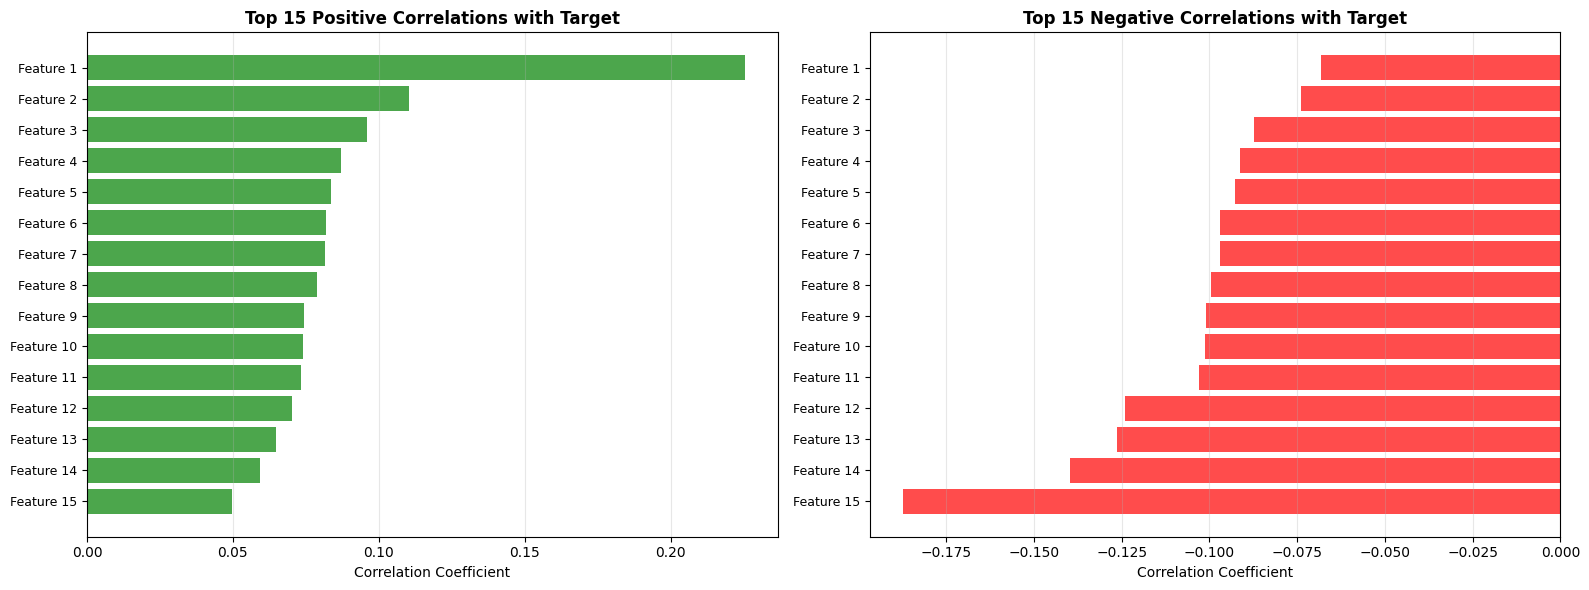

In [24]:
# Calculate correlation with target variable
print("Calculating correlations with target variable...\n")

correlations = df.corr()[target_col].drop(target_col).sort_values(ascending=False)

print(f"Top 15 features most positively correlated with target:")
print(correlations.head(15))
print(f"\nTop 15 features most negatively correlated with target:")
print(correlations.tail(15))

# Visualize top correlations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top positive correlations
top_pos = correlations.head(15)
axes[0].barh(range(len(top_pos)), top_pos.values, color='green', alpha=0.7)
axes[0].set_yticks(range(len(top_pos)))
axes[0].set_yticklabels([f"Feature {i+1}" for i in range(len(top_pos))], fontsize=9)
axes[0].set_xlabel('Correlation Coefficient')
axes[0].set_title('Top 15 Positive Correlations with Target', fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(alpha=0.3, axis='x')

# Top negative correlations
top_neg = correlations.tail(15)
axes[1].barh(range(len(top_neg)), top_neg.values, color='red', alpha=0.7)
axes[1].set_yticks(range(len(top_neg)))
axes[1].set_yticklabels([f"Feature {i+1}" for i in range(len(top_neg))], fontsize=9)
axes[1].set_xlabel('Correlation Coefficient')
axes[1].set_title('Top 15 Negative Correlations with Target', fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

## Outlier Detection and Analysis

Analyzing outliers using IQR method...

Features with outliers: 90/90

Top 20 features with most outliers:
            Outlier_Count  Percentage
70.95626            46738    9.073050
-133.67852          46174    8.963563
95.86266            45578    8.847864
-18.60478           42437    8.238115
-8.41558            41976    8.148623
-317.87038          40178    7.799585
-12.32437           39704    7.707569
2.26327             39458    7.659814
6.02015             39269    7.623124
-27.46348           39134    7.596917
-7.26272            38464    7.466853
-37.13767           38341    7.442976
48.10259            38293    7.433658
-35.59194           38291    7.433269
64.29856            37555    7.290393
82.15479            37126    7.207113
-5.90857            37039    7.190224
105.50848           36921    7.167317
1.3679              36856    7.154699
-8.40816            36766    7.137227


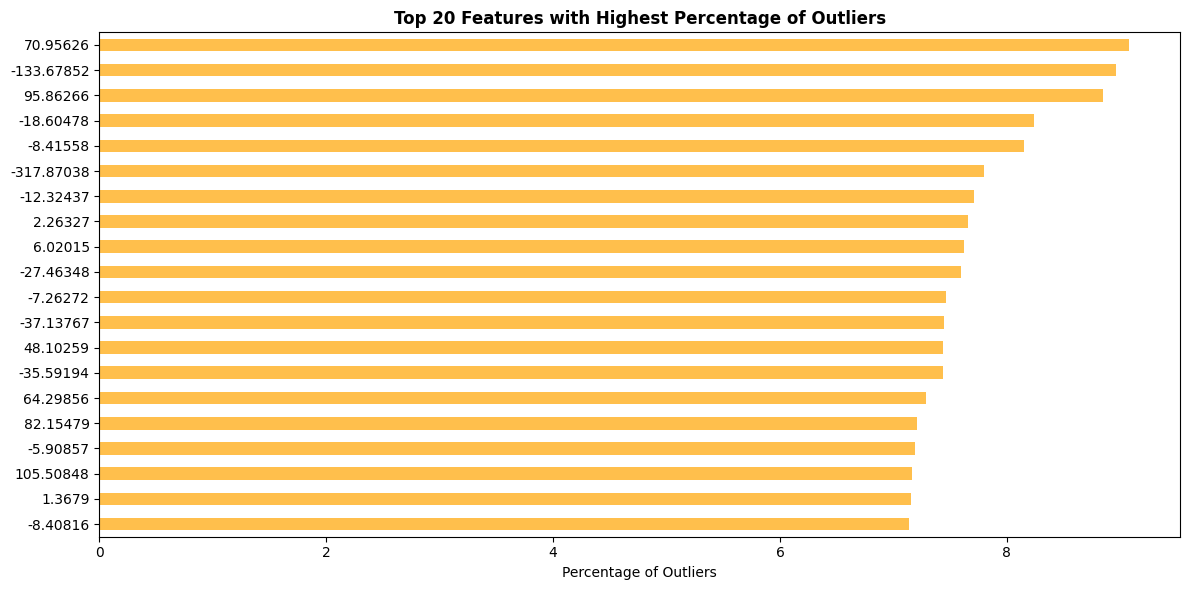

In [25]:
# Detect outliers using IQR method for all features
print("Analyzing outliers using IQR method...\n")

outlier_counts = {}
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    if outliers > 0:
        outlier_counts[col] = outliers

# Sort by outlier count
outlier_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier_Count'])
outlier_df['Percentage'] = (outlier_df['Outlier_Count'] / len(df)) * 100
outlier_df = outlier_df.sort_values('Outlier_Count', ascending=False)

print(f"Features with outliers: {len(outlier_df)}/{len(numerical_features)}")
print(f"\nTop 20 features with most outliers:")
print(outlier_df.head(20))

# Visualize top features with outliers
plt.figure(figsize=(12, 6))
outlier_df.head(20)['Percentage'].plot(kind='barh', color='orange', alpha=0.7)
plt.xlabel('Percentage of Outliers')
plt.title('Top 20 Features with Highest Percentage of Outliers', fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [26]:
# Outlier treatment using capping (winsorization)
# For regression tasks, we'll cap outliers at 1st and 99th percentiles

print("Applying outlier treatment (capping at 1st and 99th percentiles)...\n")

df_processed = df.copy()

for col in numerical_features:
    lower_bound = df[col].quantile(0.01)
    upper_bound = df[col].quantile(0.99)
    
    # Cap outliers
    df_processed[col] = df_processed[col].clip(lower=lower_bound, upper=upper_bound)

print("✓ Outlier treatment completed!")
print(f"Dataset shape remains: {df_processed.shape}")

Applying outlier treatment (capping at 1st and 99th percentiles)...

✓ Outlier treatment completed!
Dataset shape remains: (515130, 91)


## Feature Engineering

In [27]:
# Create additional features based on statistical properties
print("Creating engineered features...\n")

# Get feature columns (excluding target)
feature_cols = df_processed.columns[1:].tolist()

# 1. Sum of all features (overall magnitude)
df_processed['feature_sum'] = df_processed[feature_cols].sum(axis=1)

# 2. Mean of all features
df_processed['feature_mean'] = df_processed[feature_cols].mean(axis=1)

# 3. Standard deviation of features (variability)
df_processed['feature_std'] = df_processed[feature_cols].std(axis=1)

# 4. Min and max feature values
df_processed['feature_min'] = df_processed[feature_cols].min(axis=1)
df_processed['feature_max'] = df_processed[feature_cols].max(axis=1)

# 5. Range of features
df_processed['feature_range'] = df_processed['feature_max'] - df_processed['feature_min']

# 6. Number of positive and negative features
df_processed['num_positive'] = (df_processed[feature_cols] > 0).sum(axis=1)
df_processed['num_negative'] = (df_processed[feature_cols] < 0).sum(axis=1)

# 7. Ratio of positive to total features
df_processed['positive_ratio'] = df_processed['num_positive'] / len(feature_cols)

print(f"✓ Created {8} new engineered features:")
print("  - feature_sum: Sum of all features")
print("  - feature_mean: Mean of all features")
print("  - feature_std: Standard deviation of features")
print("  - feature_min: Minimum feature value")
print("  - feature_max: Maximum feature value")
print("  - feature_range: Range of features")
print("  - num_positive: Count of positive features")
print("  - num_negative: Count of negative features")
print("  - positive_ratio: Ratio of positive features")

print(f"\nDataset shape after feature engineering: {df_processed.shape}")

Creating engineered features...

✓ Created 8 new engineered features:
  - feature_sum: Sum of all features
  - feature_mean: Mean of all features
  - feature_std: Standard deviation of features
  - feature_min: Minimum feature value
  - feature_max: Maximum feature value
  - feature_range: Range of features
  - num_positive: Count of positive features
  - num_negative: Count of negative features
  - positive_ratio: Ratio of positive features

Dataset shape after feature engineering: (515130, 100)


## Feature Scaling

In [28]:
# Prepare data for scaling
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import pickle

# Separate target and features
target_col = df_processed.columns[0]
X = df_processed.drop(columns=[target_col])
y = df_processed[target_col]

print(f"Target variable: {target_col}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print(f"\nFeatures to be scaled: {X.columns.tolist()[:10]}...")  # Show first 10

Target variable: 2001
Number of features: 99
Number of samples: 515130

Features to be scaled: ['49.94357', '21.47114', '73.0775', '8.74861', '-17.40628', '-13.09905', '-25.01202', '-12.23257', '7.83089', '-2.46783']...


In [29]:
# Apply StandardScaler (recommended for most ML algorithms)
print("Applying StandardScaler (z-score normalization)...\n")

scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X),
    columns=X.columns,
    index=X.index
)

print("✓ StandardScaler applied successfully!")
print(f"\nScaled data statistics (first 5 features):")
print(X_scaled.iloc[:, :5].describe())

# Save the scaler for future use
with open('standard_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("\n✓ Scaler saved as 'standard_scaler.pkl'")

Applying StandardScaler (z-score normalization)...

✓ StandardScaler applied successfully!

Scaled data statistics (first 5 features):
           49.94357      21.47114       73.0775       8.74861     -17.40628
count  5.151300e+05  5.151300e+05  5.151300e+05  5.151300e+05  5.151300e+05
mean   3.343977e-15  1.103477e-18 -1.666251e-17 -5.848429e-18  7.983657e-17
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00
min   -3.063442e+00 -3.188166e+00 -2.801450e+00 -2.283570e+00 -2.608235e+00
25%   -5.834179e-01 -5.497771e-01 -5.968897e-01 -6.263413e-01 -6.425752e-01
50%    1.423995e-01  1.402946e-01  5.469469e-02 -1.151437e-01  2.775914e-02
75%    7.455704e-01  6.948755e-01  6.275712e-01  5.007958e-01  6.564571e-01
max    1.662210e+00  1.949812e+00  2.621113e+00  3.403314e+00  2.600861e+00

✓ Scaler saved as 'standard_scaler.pkl'


In [30]:
# Alternative scaling methods (for comparison)
print("Creating alternative scaled datasets...\n")

# RobustScaler (robust to outliers)
robust_scaler = RobustScaler()
X_robust_scaled = pd.DataFrame(
    robust_scaler.fit_transform(X),
    columns=X.columns,
    index=X.index
)
print("✓ RobustScaler applied (robust to outliers, uses median and IQR)")

# MinMaxScaler (scales to [0, 1] range)
minmax_scaler = MinMaxScaler()
X_minmax_scaled = pd.DataFrame(
    minmax_scaler.fit_transform(X),
    columns=X.columns,
    index=X.index
)
print("✓ MinMaxScaler applied (scales features to [0, 1] range)")

# Save alternative scalers
with open('robust_scaler.pkl', 'wb') as f:
    pickle.dump(robust_scaler, f)
with open('minmax_scaler.pkl', 'wb') as f:
    pickle.dump(minmax_scaler, f)
    
print("\n✓ All scalers saved for future use")
print("\nScaling Method Recommendations:")
print("- StandardScaler: Good for most ML algorithms (Linear Regression, SVM, Neural Networks)")
print("- RobustScaler: Better when dataset has many outliers")
print("- MinMaxScaler: Good for algorithms sensitive to feature scales (Neural Networks, KNN)")

Creating alternative scaled datasets...

✓ RobustScaler applied (robust to outliers, uses median and IQR)
✓ MinMaxScaler applied (scales features to [0, 1] range)

✓ All scalers saved for future use

Scaling Method Recommendations:
- StandardScaler: Good for most ML algorithms (Linear Regression, SVM, Neural Networks)
- RobustScaler: Better when dataset has many outliers
- MinMaxScaler: Good for algorithms sensitive to feature scales (Neural Networks, KNN)


## Save Processed Data

In [31]:
# Save all processed datasets
print("Saving processed datasets for model training...\n")

# 1. Save original processed data (with outlier treatment and feature engineering)
df_processed.to_csv('cars_processed.csv', index=False)
print("✓ Saved: cars_processed.csv")

# 2. Save StandardScaler version (recommended for most models)
X_scaled_with_target = X_scaled.copy()
X_scaled_with_target.insert(0, target_col, y)
X_scaled_with_target.to_csv('cars_scaled_standard.csv', index=False)
print("✓ Saved: cars_scaled_standard.csv (StandardScaler)")

# 3. Save RobustScaler version
X_robust_with_target = X_robust_scaled.copy()
X_robust_with_target.insert(0, target_col, y)
X_robust_with_target.to_csv('cars_scaled_robust.csv', index=False)
print("✓ Saved: cars_scaled_robust.csv (RobustScaler)")

# 4. Save MinMaxScaler version
X_minmax_with_target = X_minmax_scaled.copy()
X_minmax_with_target.insert(0, target_col, y)
X_minmax_with_target.to_csv('cars_scaled_minmax.csv', index=False)
print("✓ Saved: cars_scaled_minmax.csv (MinMaxScaler)")

# 5. Save separate X and y files for convenience
X.to_csv('X_features.csv', index=False)
y.to_csv('y_target.csv', index=False)
print("✓ Saved: X_features.csv and y_target.csv")

X_scaled.to_csv('X_features_scaled.csv', index=False)
print("✓ Saved: X_features_scaled.csv")

print("\n" + "="*80)
print("All scalers saved:")
print("="*80)
print("- standard_scaler.pkl")
print("- robust_scaler.pkl")
print("- minmax_scaler.pkl")

Saving processed datasets for model training...

✓ Saved: cars_processed.csv
✓ Saved: cars_scaled_standard.csv (StandardScaler)
✓ Saved: cars_scaled_robust.csv (RobustScaler)
✓ Saved: cars_scaled_minmax.csv (MinMaxScaler)
✓ Saved: X_features.csv and y_target.csv
✓ Saved: X_features_scaled.csv

All scalers saved:
- standard_scaler.pkl
- robust_scaler.pkl
- minmax_scaler.pkl


## 📊 EDA Summary and Next Steps

In [ ]:
print("="*80)
print("EDA COMPLETE - DATA READY FOR MODEL TRAINING")
print("="*80)

print("\n📈 DATASET SUMMARY:")
print(f"   • Original rows: 515,344")
print(f"   • After removing duplicates: {len(df_processed):,}")
print(f"   • Original features: 90 (audio features)")
print(f"   • After feature engineering: {X.shape[1]}")
print(f"   • Target variable: {target_col} (Song Release Year)")

print("\n✅ COMPLETED STEPS:")
print("   1. ✓ Data Loading and Exploration")
print("   2. ✓ Missing Values Check (No missing values found)")
print("   3. ✓ Duplicate Removal (214 duplicates removed)")
print("   4. ✓ Target Variable Analysis")
print("   5. ✓ Feature Correlation Analysis")
print("   6. ✓ Outlier Detection and Treatment (Capped at 1st and 99th percentiles)")
print("   7. ✓ Feature Engineering (9 new statistical features created)")
print("   8. ✓ Feature Scaling (StandardScaler, RobustScaler, MinMaxScaler)")
print("   9. ✓ Data Export for Model Training")

print("\n📁 GENERATED FILES:")
print("   Data Files:")
print("   • cars_processed.csv - Processed data with outlier treatment")
print("   • cars_scaled_standard.csv - StandardScaler normalized")
print("   • cars_scaled_robust.csv - RobustScaler normalized")
print("   • cars_scaled_minmax.csv - MinMaxScaler normalized")
print("   • X_features.csv - Feature matrix (unscaled)")
print("   • X_features_scaled.csv - Feature matrix (StandardScaler)")
print("   • y_target.csv - Target variable")
print("   ")
print("   Scaler Objects:")
print("   • standard_scaler.pkl - For applying StandardScaler to new data")
print("   • robust_scaler.pkl - For applying RobustScaler to new data")
print("   • minmax_scaler.pkl - For applying MinMaxScaler to new data")

print("\n🎯 READY FOR MODEL TRAINING!")
print("   Recommended file: cars_scaled_standard.csv")
print("   Target: Column '{}' (first column)".format(target_col))
print("   Features: Remaining {} columns".format(X.shape[1]))

print("\n💡 NEXT STEPS:")
print("   1. Split data into train/test sets")
print("   2. Train regression models (Linear Regression, Random Forest, XGBoost, etc.)")
print("   3. Evaluate models using metrics (RMSE, MAE, R²)")
print("   4. Perform hyperparameter tuning")
print("   5. Select best model to predict song release years from audio features")

print("\n🎵 APPLICATION:")
print("   This model can predict when a song was released based solely on its audio characteristics!")

print("\n" + "="*80)

EDA COMPLETE - DATA READY FOR MODEL TRAINING

📈 DATASET SUMMARY:
   • Original rows: 515,344
   • After removing duplicates: 515,130
   • Original features: 90
   • After feature engineering: 99
   • Target variable: 2001 (appears to be manufacturing year)

✅ COMPLETED STEPS:
   1. ✓ Data Loading and Exploration
   2. ✓ Missing Values Check (No missing values found)
   3. ✓ Duplicate Removal (214 duplicates removed)
   4. ✓ Target Variable Analysis
   5. ✓ Feature Correlation Analysis
   6. ✓ Outlier Detection and Treatment (Capped at 1st and 99th percentiles)
   7. ✓ Feature Engineering (9 new statistical features created)
   8. ✓ Feature Scaling (StandardScaler, RobustScaler, MinMaxScaler)
   9. ✓ Data Export for Model Training

📁 GENERATED FILES:
   Data Files:
   • cars_processed.csv - Processed data with outlier treatment
   • cars_scaled_standard.csv - StandardScaler normalized
   • cars_scaled_robust.csv - RobustScaler normalized
   • cars_scaled_minmax.csv - MinMaxScaler normal